In [2]:
from GraphSampler import GraphSample
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy.stats import ks_2samp

In [35]:
def run_experiment_web(graph):
    experiment_result = pd.DataFrame(columns=["percentage","avg_clustering","degrees",
                                              "alg","C","alpha","m","time_sample","time_clust","V"])
    sampler = GraphSample()
    for n in range(10,11):
        print("n %s" % n)
        target_size = n/100
        
        C = 71
        alpha = 0.2
        time_sample_start = time.time()
        nodes, edges = GraphSample().list_sampling(graph,target_size=target_size, V2=False)
        time_sample = time.time() - time_sample_start
        time_sample = float('%.2f' % time_sample)
        
        time_clust_start = time.time()
        list_clust = nx.average_clustering(graph, nodes)
        time_clust = time.time() - time_clust_start
        time_clust = float('%.2f' % time_clust)
        experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":list_clust,
                                  "degrees":nx.degree(graph, nodes),"alg":"list","time_sample":time_sample,
                                                      "time_clust":time_clust,"V":1},ignore_index=True)
        
        time_sample_start = time.time()
        nodes, edges = GraphSample().list_sampling(graph,target_size=target_size, V2=True)
        time_sample = time.time() - time_sample_start
        time_sample = float('%.2f' % time_sample)
        
        time_clust_start = time.time()
        list_clust = nx.average_clustering(graph, nodes)
        time_clust = time.time() - time_clust_start
        time_clust = float('%.2f' % time_clust)
        
        experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":list_clust,
                                  "degrees":nx.degree(graph, nodes),"alg":"list","time_sample":time_sample,
                                                      "time_clust":time_clust,"V":2},ignore_index=True)
        
        time_sample_start = time.time()
        nodes_gmd, edges_gmd, eps = GraphSample().gmd(graph,target_size=target_size, C=C)
        time_sample = time.time() - time_sample_start
        time_sample = float('%.2f' % time_sample)
        
        time_clust_start = time.time()
        gmd_clust = sampler.avg_clustering_gmd(graph,nodes_gmd,eps,C)
        time_clust = time.time() - time_clust_start
        time_clust = float('%.2f' % time_clust)
        
        experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":gmd_clust,
                                  "degrees":nx.degree(graph,nodes_gmd),"alg":"gmd","time_sample":time_sample,
                                   "time_clust":time_clust, "C":C},ignore_index=True)
            
        time_sample_start = time.time()
        nodes_rcmh, edges_rcmh = GraphSample().rcmhrw(graph,target_size = target_size, alpha= alpha)
        time_sample = time.time() - time_sample_start
        time_sample = float('%.2f' % time_sample)
        
        time_clust_start = time.time()
        rcmh_clust = sampler.avg_clustering_rcmh(graph,nodes_rcmh,alpha)
        time_clust = time.time() - time_clust_start
        time_clust = float('%.2f' % time_clust)
                    
        experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":rcmh_clust,
                                  "degrees":nx.degree(graph,nodes_rcmh),"alg":"rcmh","time_sample":time_sample,
                                    "time_clust":time_clust,"alpha":alpha},ignore_index=True)
    
    return experiment_result

In [36]:
def run_ba(m_list,target_size,C, alpha):
    sampler = GraphSample()
    experiment_result = pd.DataFrame(columns=["percentage","avg_clustering","degrees","time_sample","time_clust",
                                              "true_clust","alg","C","alpha","m","true_degree","V"])
    for m in m_list:
        print(m)
        g = nx.barabasi_albert_graph(5000,m, seed = 0)
        true_clust = nx.average_clustering(g)
        for run in range(5):
            time_sample_start = time.time()
            nodes, edges = GraphSample().list_sampling(g,target_size=target_size)
            time_sample = time.time() - time_sample_start
            time_sample = float('%.2f' % time_sample)
            
            time_clust_start = time.time()
            list_clust = nx.average_clustering(g, nodes)
            time_clust = time.time() - time_clust_start
            time_clust = float('%.2f' % time_clust)
            
            experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":list_clust,
                                      "degrees":nx.degree(g,nodes),"true_clust":true_clust,"time_sample":time_sample,
                                       "time_clust":time_clust,"alg":"list","m":m,
                                        "true_degree":nx.degree(g),"V":1},ignore_index=True)
            time_sample_start = time.time()
            nodes, edges = GraphSample().list_sampling(g,target_size=target_size, V2=True)
            time_sample = time.time() - time_sample_start
            time_sample = float('%.2f' % time_sample)
        
            time_clust_start = time.time()
            list_clust = nx.average_clustering(g, nodes)
            time_clust = time.time() - time_clust_start
            time_clust = float('%.2f' % time_clust)
            experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":list_clust,
                                      "degrees":nx.degree(g,nodes),"true_clust":true_clust,"time_sample":time_sample,
                                   "time_clust":time_clust,
                                      "alg":"list","m":m,"true_degree":nx.degree(g),"V":2},ignore_index=True)
            time_sample_start = time.time()
      
            nodes_gmd, edges_gmd, eps = GraphSample().gmd(g,target_size=target_size, C= C)
            time_sample = time.time() - time_sample_start
            time_sample = float('%.2f' % time_sample)
        
            time_clust_start = time.time()
            gmd_clust = sampler.avg_clustering_gmd(g,nodes_gmd,eps,C)
            time_clust = time.time() - time_clust_start
            time_clust = float('%.2f' % time_clust)
            experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":gmd_clust,
                                      "degrees":nx.degree(g,nodes_gmd),"true_clust":true_clust,"time_sample":time_sample,
                                   "time_clust":time_clust,
                                      "alg":"gmd", "C": C,"m":m,"true_degree":nx.degree(g)},ignore_index=True)    
            time_sample_start = time.time()
            nodes_rcmh, edges_rcmh = GraphSample().rcmhrw(g,target_size = target_size, alpha= alpha)
            time_sample = time.time() - time_sample_start
            time_sample = float('%.2f' % time_sample)
        
            time_clust_start = time.time()
            rcmh_clust = sampler.avg_clustering_rcmh(g,nodes_rcmh,alpha)
            time_clust = time.time() - time_clust_start
            time_clust = float('%.2f' % time_clust)
            experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":rcmh_clust,
                                      "degrees":nx.degree(g,nodes_rcmh),"true_clust":true_clust,"time_sample":time_sample,
                                   "time_clust":time_clust,
                                      "alg":"rcmh", "alpha": alpha,"m":m,"true_degree":nx.degree(g)},ignore_index=True)    
    return experiment_result           

In [37]:
def run_gnp(m_list,target_size):
    sampler = GraphSample()
    experiment_result = pd.DataFrame(columns=["percentage","avg_clustering","nodes","time_sample","time_clust",
                                              "true_clust","alg","C","alpha","p","true_degree","V"])
    for p in m_list:
        
        print(p)
        g = nx.gnp_random_graph(5000,p, seed = 0)
        true_clust = nx.average_clustering(g)
        time_sample_start = time.time()
        nodes, edges = GraphSample().list_sampling(g,target_size=target_size)
        time_sample = time.time() - time_sample_start
        time_sample = float('%.2f' % time_sample)
    
        time_clust_start = time.time()
        list_clust = nx.average_clustering(g, nodes)
        time_clust = time.time() - time_clust_start
        time_clust = float('%.2f' % time_clust)
        experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":list_clust,
                                      "degrees":nx.degree(g,nodes),"true_clust":true_clust,"time_sample":time_sample,
                                   "time_clust":time_clust,
                                      "alg":"list1","p":p,"true_degree":nx.degree(g), "V":1},ignore_index=True)
        time_sample_start = time.time()
        nodes, edges = GraphSample().list_sampling(g,target_size=target_size, V2=True)
        time_sample = time.time() - time_sample_start
        time_sample = float('%.2f' % time_sample)
    
        time_clust_start = time.time()
        list_clust = nx.average_clustering(g, nodes)
        time_clust = time.time() - time_clust_start
        time_clust = float('%.2f' % time_clust)
        experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":list_clust,
                                      "degrees":nx.degree(g,nodes),"true_clust":true_clust,"time_sample":time_sample,
                                   "time_clust":time_clust,
                                      "alg":"list2","p":p,"true_degree":nx.degree(g), "V":2},ignore_index=True)
        
        for run in range(6):
            c_options = {0:0,1:30,2:50,3:70,4:100,5:150}
            C = c_options[run]
            time_sample_start = time.time()
      
            nodes_gmd, edges_gmd, eps = GraphSample().gmd(g,target_size=target_size, C= C)
            time_sample = time.time() - time_sample_start
            time_sample = float('%.2f' % time_sample)
        
            time_clust_start = time.time()
            gmd_clust = sampler.avg_clustering_gmd(g,nodes_gmd,eps,C)
            time_clust = time.time() - time_clust_start
            time_clust = float('%.2f' % time_clust)
            experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":gmd_clust,
                                      "degrees":nx.degree(g,nodes_gmd),"true_clust":true_clust,"time_sample":time_sample,
                                   "time_clust":time_clust,
                                      "alg":"gmd", "C": C,"p":p,"true_degree":nx.degree(g)},ignore_index=True)
        
            alpha_options = {0:0,1:0.2,2:0.4,3:0.6,4:0.8,5:1}
            alpha = alpha_options[run]
           
            time_sample_start = time.time()
            nodes_rcmh, edges_rcmh = GraphSample().rcmhrw(g,target_size = target_size, alpha= alpha)
            time_sample = time.time() - time_sample_start
            time_sample = float('%.2f' % time_sample)
        
            time_clust_start = time.time()
            rcmh_clust = sampler.avg_clustering_rcmh(g,nodes_rcmh,alpha)
            time_clust = time.time() - time_clust_start
            time_clust = float('%.2f' % time_clust)
            experiment_result = experiment_result.append({"percentage":target_size,"avg_clustering":rcmh_clust,
                                      "degrees":nx.degree(g,nodes_gmd),"true_clust":true_clust,"time_sample":time_sample,
                                   "time_clust":time_clust,
                                      "alg":"rcmh", "alpha": alpha,"p":p,"true_degree":nx.degree(g)},ignore_index=True)    
    return experiment_result

In [38]:
def convert_degree(entry):
    temp = entry.replace("(","")
    temp = temp.replace(")","")
    temp = temp.replace("[","")
    temp = temp.replace("]","")
    temp = temp.replace(" ","")
    temp = temp.replace("'","")
    temp = temp.split(",")
    temp = list(map(int,temp))
    final_true  = list()
    for x in range(0,len(temp),2):
        final_true.append((temp[x],temp[x+1]))
    return(final_true)

In [34]:
experiment_result = run_ba([1,26,75,250,500],0.1,71,0.1)
experiment_result.to_csv("results/barabasi.csv")

1
26
75
250
500


In [35]:
experiment_result = run_gnp([0.01,0.05,0.1],0.1)
experiment_result.to_csv("results/gnp.csv")

0.01
0.05
0.1


In [36]:
experiment_result = run_gnp([0.01,0.05,0.1],0.01)
experiment_result.to_csv("results/gnp_smaller_sample.csv")

0.01
0.05
0.1


In [39]:
enron = nx.read_edgelist("data/email-Enron.txt")
enron = run_experiment_web(enron)
enron.to_csv("results/enron.csv")

n 10


In [40]:
web_stan = nx.read_edgelist("data/web-Stanford.txt")
stanford = run_experiment_web(web_stan)
stanford.to_csv("results/web_stan.csv")

n 10


In [ ]:
web = nx.read_edgelist("data/web-BerkStan.txt")
experiment_result = run_experiment_web(web)
experiment_result.to_csv("results/web.csv")

In [12]:
results_web = pd.read_csv("results/web.csv")
results_web["true_clust"] = 0.5967

In [15]:
# H0 All algorithms produce accurate results
print(results_web[["avg_clustering","true_clust","alg","time_sample","time_clust"]])

   avg_clustering  true_clust   alg  time_sample  time_clust
0        0.479394      0.5967  list       683.55       39.61
1        0.000000      0.5967   gmd         0.47        0.14
2        0.565354      0.5967  rcmh         4.61      280.64
3        0.482849      0.5967  list      1405.11       49.88
4        0.545768      0.5967   gmd        13.56      735.56
5        0.466936      0.5967  rcmh         4.04      230.99


In [44]:
results = pd.read_csv("results/barabasi.csv")

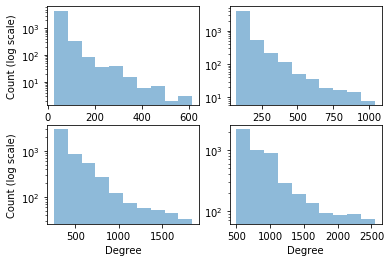

In [10]:
fig = plt.figure()
# m = 26
plt.subplot(2, 2, 1)
true_degree = convert_degree(results.loc[20]["true_degree"]) 
deg = [x[1] for x in true_degree]
plt.hist([x for x in deg], alpha=0.5, label='x', log=True)
plt.ylabel("Count (log scale)")
# m = 75
plt.subplot(2, 2, 2)
true_degree = convert_degree(results.loc[40]["true_degree"]) 
deg = [x[1] for x in true_degree]
plt.hist([x for x in deg], alpha=0.5, label='x', log=True)
# m = 250
plt.subplot(2, 2, 3)
true_degree = convert_degree(results.loc[60]["true_degree"]) 
deg = [x[1] for x in true_degree]
plt.hist([x for x in deg], alpha=0.5, label='x', log=True)
plt.xlabel("Degree")
plt.ylabel("Count (log scale)")
# m = 500
plt.subplot(2, 2, 4)
true_degree = convert_degree(results.loc[90]["true_degree"]) 
deg = [x[1] for x in true_degree]
plt.hist([x for x in deg], alpha=0.5, label='x', log=True)
plt.xlabel("Degree")

plt.savefig("H1_hists.png")
plt.show()


In [45]:
# Hypothesis 1: List Algorithm introduces less degree bias then the other sampling methods
def obtain_ks_results(results):
    # function takes a results object and computes the KS statistics for every row 
    ks_results = pd.DataFrame(columns=["m","alg","statistics","p-value", "V"])
    
    for i in range(0,results.shape[0]):
        # select the true degree distribution
        true_degree = convert_degree(results.loc[i]["true_degree"]) 
        true_degree = [x[1] for x in true_degree]
        # select the degree distribution of the sampled nodes
        sampled_degree = convert_degree(results.loc[i]["degrees"]) 
        sampled_degree = [x[1] for x in sampled_degree]
        # perform a two sample KS test
        ks_test = ks_2samp(true_degree,sampled_degree)
        ks_results = ks_results.append({"m":results.loc[i]["m"],"alg":results.loc[i]["alg"],
                           "statistics":ks_test[0],"p-value":ks_test[1], "V":results.loc[i]["V"]}, ignore_index=True)    
    return(ks_results)

In [46]:
ks_results = obtain_ks_results(results)
print(ks_results.head())

   m   alg  statistics       p-value    V
0  1  list    0.096447  4.059038e-04  1.0
1  1  list    0.011925  9.999998e-01  2.0
2  1   gmd    0.313000  4.183878e-39  NaN
3  1  rcmh    0.343400  5.536764e-47  NaN
4  1  list    0.082178  3.996809e-03  1.0


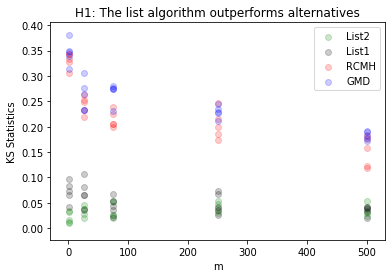

In [47]:
# figure for H1
plt.scatter(ks_results[(ks_results["alg"]=="list") & (ks_results["V"]==2)]["m"], 
            ks_results[(ks_results["alg"]=="list") & (ks_results["V"]==2)]["statistics"], 
            c = "green", alpha=0.2,label="List2")
plt.scatter(ks_results[(ks_results["alg"]=="list") & (ks_results["V"]==1)]["m"], 
            ks_results[(ks_results["alg"]=="list") & (ks_results["V"]==1)]["statistics"], 
            c = "black", alpha=0.2,label="List1")
plt.scatter(ks_results[ks_results["alg"]=="rcmh"]["m"], ks_results[ks_results["alg"]=="rcmh"]["statistics"], 
            c = "red", alpha=0.2, label="RCMH")
plt.scatter(ks_results[ks_results["alg"]=="gmd"]["m"], ks_results[ks_results["alg"]=="gmd"]["statistics"], 
            c = "blue", alpha=0.2, label ="GMD")
plt.legend(loc="upper right")
plt.ylabel("KS Statistics")
plt.xlabel("m")
plt.title("H1: The list algorithm outperforms alternatives")
plt.savefig("KS.png")

In [53]:
list2_results = results[(results["alg"]=="list") & (results["V"]==2)]
list1_results = results[(results["alg"]=="list") & (results["V"]==1)]
rcmh_results = results[results["alg"]=="rcmh"]
gmd_results = results[results["alg"]=="gmd"]

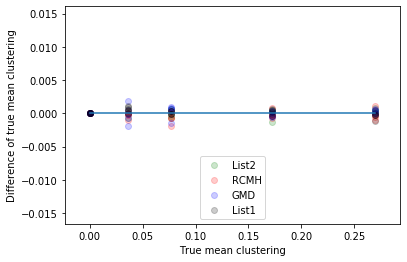

In [54]:
# variability much better seen for green
plt.scatter(list2_results["true_clust"], list2_results["avg_clustering"]-list2_results["true_clust"], 
            c = "green", alpha=0.2,label="List2")
plt.scatter(rcmh_results["true_clust"], rcmh_results["avg_clustering"]-rcmh_results["true_clust"], 
            c = "red", alpha=0.2, label="RCMH")
plt.scatter(gmd_results["true_clust"], gmd_results["avg_clustering"]-gmd_results["true_clust"], 
            c = "blue", alpha=0.2, label ="GMD")
plt.scatter(list1_results["true_clust"], list1_results["avg_clustering"]-list1_results["true_clust"], 
            c = "black", alpha=0.2,label="List1")


plt.legend(loc="lower center")
plt.plot(results["true_clust"],results["true_clust"]-results["true_clust"])
plt.ylabel("Difference of true mean clustering")
plt.xlabel("True mean clustering")
plt.savefig("diff_true_mean_BA.png")


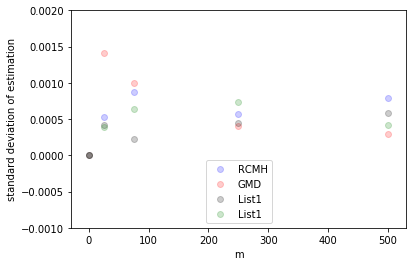

In [55]:
# H2 Standard deviations of avg clustering coefficients are tiny
#rcmh_results.groupby("m").std().index
plt.scatter(rcmh_results.groupby("m").std().index, rcmh_results.groupby("m").std()["avg_clustering"], 
            c = "blue", alpha=0.2, label ="RCMH")
plt.scatter(gmd_results.groupby("m").std().index, gmd_results.groupby("m").std()["avg_clustering"], 
            c = "red", alpha=0.2, label ="GMD")
plt.scatter(list1_results.groupby("m").std().index, list1_results.groupby("m").std()["avg_clustering"], 
            c = "black", alpha=0.2, label ="List1")
plt.scatter(list2_results.groupby("m").std().index, list2_results.groupby("m").std()["avg_clustering"], 
            c = "green", alpha=0.2, label ="List1")
plt.ylim(-0.001,0.002)
plt.legend(loc="lower center")
plt.xlabel("m")
plt.ylabel("standard deviation of estimation")
plt.savefig("std_ba_plot.png")

In [56]:
# H3 computing the samples in time beneficial 
gnp_results = pd.read_csv("results/gnp.csv")

In [58]:
grouped_gnp = gnp_results.groupby(["alg","p"]).mean()
grouped_resetted =grouped_gnp.reset_index()

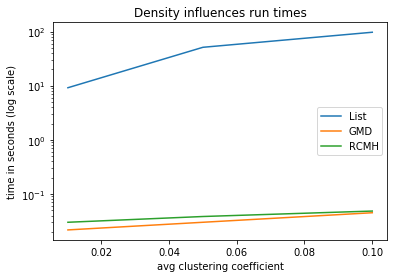

In [60]:
plt.plot(grouped_resetted[grouped_resetted["alg"]=="list"]["true_clust"],grouped_resetted[grouped_resetted["alg"]=="list"]["time_sample"], label="List")
plt.plot(grouped_resetted[grouped_resetted["alg"]=="gmd"]["true_clust"],grouped_resetted[grouped_resetted["alg"]=="gmd"]["time_sample"], label="GMD")
plt.plot(grouped_resetted[grouped_resetted["alg"]=="rcmh"]["true_clust"],grouped_resetted[grouped_resetted["alg"]=="rcmh"]["time_sample"], label = "RCMH")
plt.yscale("log")
plt.xlabel("avg clustering coefficient")
plt.ylabel("time in seconds (log scale)")
plt.legend(loc="right")

plt.title("Density influences run times")
plt.savefig("running_time_density.png")

In [4]:
# H4 show the running times of the algorithms including sampling
enron = pd.read_csv("results/enron.csv")
web = pd.read_csv("results/web.csv")
web_stan = pd.read_csv("results/web_stan.csv")

In [9]:
print("Enron Times")
print(enron.groupby("alg").mean()["time_clust"])
print("Web BerkStan Times")
print(web.groupby("alg").mean()["time_clust"])
print("Web Stanford Times")
print(web_stan.groupby("alg").mean()["time_clust"])

Enron Times
alg
gmd     5.930
list    0.175
rcmh    4.560
Name: time_clust, dtype: float64
Web BerkStan Times
alg
gmd     367.850
list     44.745
rcmh    255.815
Name: time_clust, dtype: float64
Web Stanford Times
alg
gmd     437.890
list     22.985
rcmh      1.850
Name: time_clust, dtype: float64


In [35]:
len(web_stan["degrees"][1])

422240

In [27]:
web_stan["alg"][2]

'gmd'